In [59]:
%load_ext autoreload
%autoreload 2

from c_mnist import *
from models import *
from functions import *
from torchvision.datasets import MNIST, FashionMNIST
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
ROOT = '//mnt/smvae/'
results = torch.load(ROOT+'evaluation/evaluations_0.txt')

In [120]:
df = pd.DataFrame.from_dict(results, orient='index')
df = df.reindex(sorted(df.index), axis=0)
df = df.rename(columns={0:'ELBO', 1:'REC', 2:'neg_KL'})
df = df[21:]
df = df.round(2)
df

,ELBO,REC,neg_KL
Normal_SMVAE_60000_0.8_1_var0.001_seed0,-524.92,-481.58,-43.33
Normal_SMVAE_60000_0.8_1_var0.003_seed0,707.93,740.52,-32.59
Normal_SMVAE_60000_0.8_1_var0.01_seed0,805.78,837.33,-31.55
Normal_SMVAE_60000_0.8_1_var0.03_seed0,547.42,572.95,-25.53
Normal_SMVAE_60000_0.8_1_var0.1_seed0,133.06,152.86,-19.80
Normal_SMVAE_60000_0.8_1_var0.3_seed0,-271.50,-263.14,-8.36
Normal_SMVAE_60000_0.8_1_var1_seed0,-729.74,-726.45,-3.29
Normal_SMVAE_60000_0_0.2_var0.001_seed0,-2178.73,-2090.10,-88.62
Normal_SMVAE_60000_0_0.2_var0.003_seed0,-1666.55,-1605.50,-61.04
Normal_SMVAE_60000_0_0.2_var0.01_seed0,2.18,61.58,-59.40


In [121]:
df[:7].index[0]

'Normal_SMVAE_60000_0.8_1_var0.001_seed0'

In [122]:
def plot_elbos(df, c='blue'):
    fig, ax = plt.subplots()
    model = df.index[0][:-15]
    labels = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
    values = list(df['ELBO'])
    # Create a line plot
    ax.plot(range(1, 8), values, marker='o', linestyle=':', color=c)
    #ax.plot(range(1, 8), values2, marker='o', linestyle=':')
    #ax.plot(range(1, 8), values3, marker='o', linestyle=':')


    plt.grid(axis='y')

    # Set the x-axis labels to the values in x_labels
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(labels, rotation=45)  # You can adjust the rotation angle as needed

    for i, value in enumerate(values):
        ax.text(i + 1, value, str(value), fontsize=10, ha='center', va='bottom')

    # Optional: Add labels and a title
    ax.set_xlabel('Observation noise ($\sigma^2$)')
    ax.set_ylabel('ELBO')
    ax.set_title(model)

    # Show the plot
    plt.show()

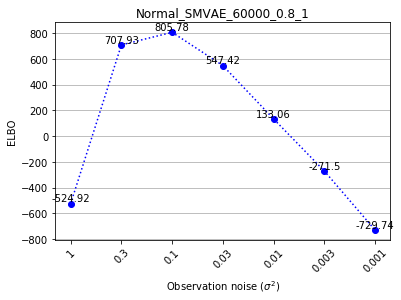

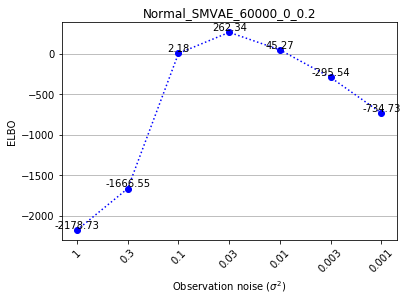

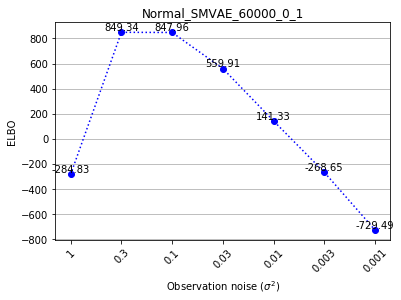

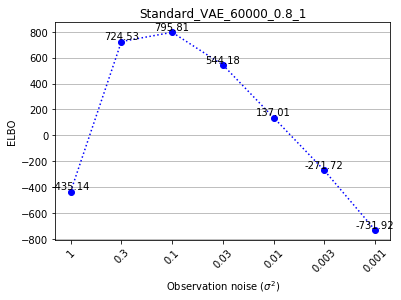

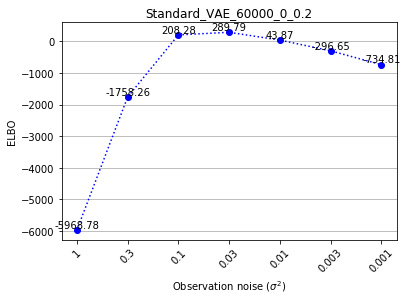

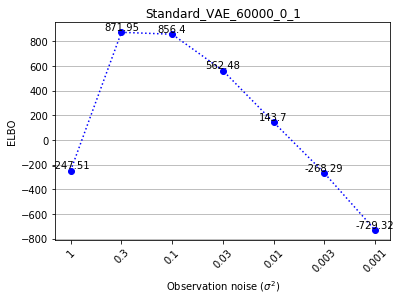

In [131]:
for i in range(6):
    plot_elbos(df[7*i:7*i+7])